# Polynomial interpolation

###  Полином какой степени нужен?  
Полином степени $n$ - это функция:

$$P_n(x) = a_0 + a_1*x + a_2*x^2 + ... + a_{n-1}*x^{n-1} + a_n*x^n$$  

Возьмем точку на плоскости. Через нее можно провести единственную прямую вида $y = a$. Кривых бОльших порядков можно провести неограниченно много (наклонные прямые, параболы и тп).  Возьмем 2 точки на плоскости. Через них можно провести единственную прямую вида $y = ax+b$. Провести через произвольные 2 точки прямую вида $y=a$ невозможно, а парабол через 2 точки можно провести сколь угодно много.  Для $N$ точек нужно взять интерполяционный полином степени $N-1$. 

In [30]:
from scipy import interpolate
# numpy пакет polynomial, который мы импортировали как Р. 
from numpy import polynomial as P
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
%matplotlib inline

Функция: $y = 3x^2 + 2x -4$

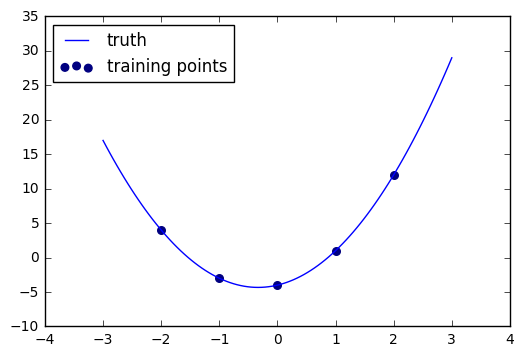

In [61]:
def f(x):
    """ function to approximate by polynomial interpolation"""
    return 3*(x**2) + 2*x -4

#-----------------------------------
# generate TRUE points 
x = np.linspace(-3, 3, 100)
y = f(x)
#print x[:10], x.shape
#print y[:10], y.shape

#-----------------------------------
# training points
X = np.linspace(-2, 2, 5)
Y = f(X)
plt.scatter(X, Y, color='navy', s=30, marker='o', label="training points")
plt.plot(x, y, label="truth")
plt.legend(loc='upper left')
#-----------------------------------  
#-----------------------------------

### Зададим полином  
В примерах задаем полином: $y = -4 + 2x + 3x^2$  

Вариант 1: задаем через список коэффициентов: $a_0, a_1, ... a_n$.

In [33]:
p1 = P.Polynomial([-4, 2, 3]) 

### Вычислим значения полинома в точках  
Найдем значения полинома в нескольких точках. В тех самых тестовых точках $-2, -1, 0, 1 , 2$.  Просто вызовем ```p1``` от списка точек и получим массив значений.  

In [37]:
x_n= [-2., -1., 0., 1. ,2.]
print x_n
print p1(x_n) 

[-2.0, -1.0, 0.0, 1.0, 2.0]
[  4.  -3.  -4.   1.  12.]


### Найдем корни полинома: roots()

In [40]:
print p1.roots()
# Проверяем:
print p1(p1.roots())

[-1.53518376  0.86851709]
[  0.00000000e+00  -1.77635684e-15]


# Интерполяция алгебраическими многочленами 
Для решения линейного уравнения для задачи интерполяции 

$$F(x) \cdot C =  y$$
где $х$ и $у$ - вектора с координатами $x_i$ и $y_i$ необходимо вычислить матрицу: 
$$F(x)$$ 
в выбранном базисе и далее решить систему линейных уравнений. Каждый класс многочленов имеет функции для вычисления (обобщенной) матрицы Вандермонда для соответствующего базиса.  Например: 
* ```np.polynomial.polynomial.polyvander``` для степенного базиса,
* ```np.polynomial.chebyshev.chebvander``` для базиса из многочленов Чебышева 
* и так далее.  

Полный список функций приведен в документации по модулю ```np.polynomial``` и его подмодулям.  Используя эти функции для создания матриц Вандерморта, мы можем легко представить интерполяционный многочлен в любом базисе. 

Возьмём известные точки:

$$
\begin{array}{r|rrrrr} 
x &-2 & -1& 0 & 1 & 2\\
\hline
y& 4  & -3&-4 & 1 &12\\
\end{array}
$$

Для интерполяции многочленом через эти точки, надо использовать полином 3 степени (количество точек - 1). Для интерполяции в степенном базисе найдем коэффициенты ci такие что f(x) = c1x0+c2x1+c3x2+c4x3 Чтобы найти эти коэффициенты, вычислим матрицу Вандермонда и решим систему интерполяционных уравнений: 

In [46]:
A = P.polynomial.polyvander(X, len(X) - 1)
c = linalg.solve(A, Y)
print c

[-4.  2.  3. -0. -0.]


Получен вектор коэффициентов: ```[-4.  2.  3. -0. -0.]```, то есть интерполяционный полином:
$$f(x) = -4 +2x + 3x^2 - 0x^4 - 0x^5$$
Используем найденный массив коэффициентов для создания интерполяционного полинома и дальнейшего вычисления значения в контольных точках $X = $ и в найденных корнях уравнения: 

In [58]:
f1 = P.Polynomial(c)
for i in f1([-2.0, -1.53518376, -1.0, 0.0, 0.86851709, 1.0, 2.0]):
    print int(i),

4 0 -3 -4 0 1 12


Найдем интерполяционный многочлен в другом базисе, например, многочленов Чебышева: 

In [64]:
A = P.chebyshev.chebvander(X, len(X)-1)
c = linalg.solve(A, Y)
print c 

[-2.5  2.   1.5 -0.  -0. ]


Как и ожидалось, в другом базисе получились другие коэффициенты и интерполяционный многочлен в базисе Чебышева:

$$f(x) = -2.5 + 2x  +1.5x^2 -0x^3 -0x^4$$
Однако, не зависимо от базиса, интерполяционный многочлен единственный и вычисляя значение в точке получаем такое же число:

In [66]:
f2 = P.Chebyshev(c)
for i in f2([-2.0, -1.53518376, -1.0, 0.0, 0.86851709, 1.0, 2.0]):
    print int(i),

4 0 -3 -4 0 1 12


Посмотрим на эти два полинома вместе на одном графике:

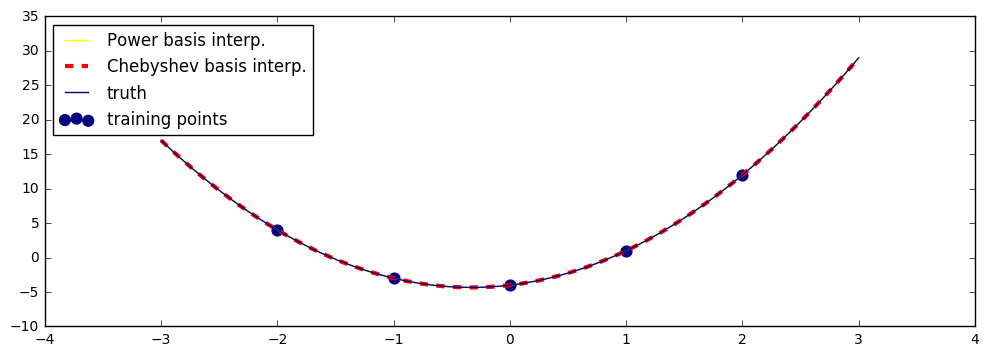

In [94]:
xx = np.linspace(x.min(), x.max(), 100)# supersampled [x[0], x[-1]] interval

fig, ax = plt.subplots(1, 1, figsize=(12, 4))
ax.plot(xx, f1(xx), 'b', lw=1, color='yellow', label='Power basis interp.')
ax.plot(xx, f2(xx), 'r--', lw=3, color='red', label='Chebyshev basis interp.')
#ax.scatter(x, y, label='data points')
ax.legend(loc=4)
#ax.set_xticks(x) 

X = np.linspace(-2, 2, 5)
Y = f(X)
plt.scatter(X, Y, color='navy', s=60, marker='o', label="training points")
plt.plot(x, y, 'g', color='navy', label="truth")
plt.legend(loc='upper left')


Это не очень удобно. Хотим увеличить порядок полинома - нужно переписывать уравнение или программировать на эту тему какую-то автоматику. Может, есть что готовое?  Используем метод ```fit``` для степенного полинома и полинома Чебышева

In [97]:
deg = len(X)-1
f1b = P.Polynomial.fit(X, Y, deg)
print f1b
f2b = P.Chebyshev.fit(X, Y, deg)
print f2b 

poly([ -4.00000000e+00   4.00000000e+00   1.20000000e+01   7.83100499e-15
   4.02132954e-15])
cheb([  2.00000000e+00   4.00000000e+00   6.00000000e+00   1.45579582e-15
   2.29671514e-15])


Интерполяция многочленами небольшого количества точек - мощный и полезный математический инструмент. Но если количество точек растет, то растет и наибольшая степень интерполяционного многочлена, что приводит к проблемам.  Полученная функция резко изменяется за пределами отрезка интерполяции. Но что более неприятно, полиномы высокой степени нехорошо себя ведут и между точками интерполяции. Хотя в точках значения полиномов разных степеней совпадают, но между ними начинают появляться биения. Результат интерполяции почти расходится в промежутке между точками у конца интервала интерполяции.  

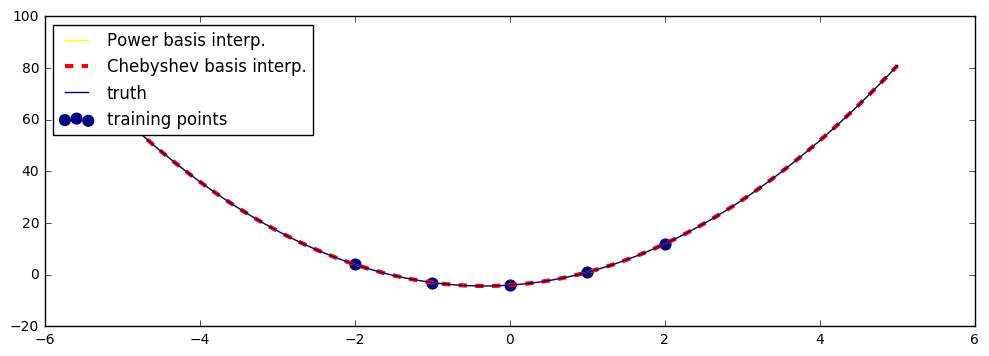

In [100]:
xx = np.linspace(-5, 5, 100)# supersampled [x[0], x[-1]] interval

fig, ax = plt.subplots(1, 1, figsize=(12, 4))
ax.plot(xx, f1(xx), 'b', lw=1, color='yellow', label='Power basis interp.')
ax.plot(xx, f2(xx), 'r--', lw=3, color='red', label='Chebyshev basis interp.')
#ax.scatter(x, y, label='data points')
ax.legend(loc=4)
#ax.set_xticks(x) 

X = np.linspace(-2, 2, 5)
Y = f(X)
plt.scatter(X, Y, color='navy', s=60, marker='o', label="training points")
plt.plot(xx, f(xx), 'g', color='navy', label="truth")
plt.legend(loc='upper left')


In [101]:
interpolate([1, 4, 9, 16], x) 

TypeError: 'module' object is not callable